In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
nx =41
dx = 2/(nx-1)
nt=25
dt = 0.01
c=1 #wavespeed =1
x = numpy.linspace(0,2,nx)
print(x)

[ 0.    0.05  0.1   0.15  0.2   0.25  0.3   0.35  0.4   0.45  0.5   0.55
  0.6   0.65  0.7   0.75  0.8   0.85  0.9   0.95  1.    1.05  1.1   1.15
  1.2   1.25  1.3   1.35  1.4   1.45  1.5   1.55  1.6   1.65  1.7   1.75
  1.8   1.85  1.9   1.95  2.  ]


In [3]:
u = numpy.ones(nx)
print(u)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.]


In [4]:
lbound = numpy.where(x>=0.5)
ubound = numpy.where(x <= 1)
print('lbound = %a' % lbound)
print('ubound =',ubound)

lbound = array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40])
ubound = (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20]),)


In [5]:
bounds = numpy.intersect1d(lbound,ubound)
print(bounds)
u[bounds]= 2
print(u)

[10 11 12 13 14 15 16 17 18 19 20]
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.]


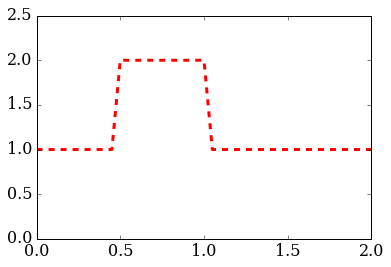

In [6]:
pyplot.plot(x,u,color='r',ls='--',lw=3)
pyplot.ylim(0,2.5);

In [7]:
for n in range(1,nt):
    un = u.copy()
    for i in range(1,nx):
        u[i] = un[i]-c*dt/dx*(un[i]-un[i-1])

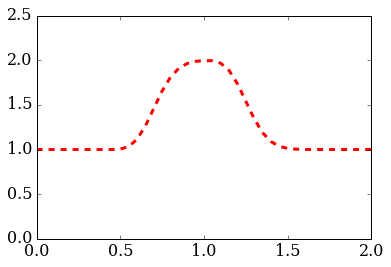

In [8]:
pyplot.plot(x,u,color='r',ls ='--',lw=3)
pyplot.ylim(0,2.5);

If we make dt small, the solution approaches the expected square wave!

**Non-linear convection**

In [32]:
nx =41
dx = 2/(nx-1)
nt = 10
dt =0.02

u = numpy.ones(nx)
u[numpy.intersect1d(lbound,ubound)]=2

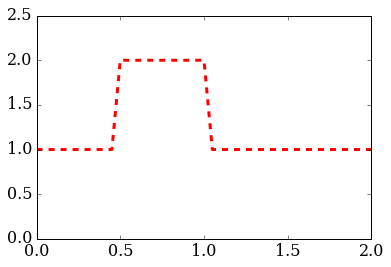

In [33]:
pyplot.plot(x,u,color='r',ls='--',lw=3)
pyplot.ylim(0,2.5);

In [12]:
for n in range(1, nt):  
    un = u.copy() 
    u[1:] = un[1:]-un[1:]*dt/dx*(un[1:]-un[0:-1]) 
    u[0] = 1.0

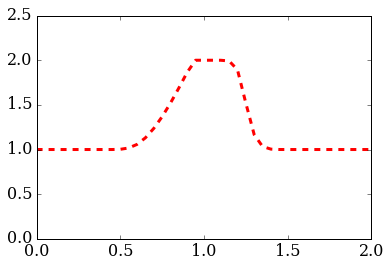

In [13]:
pyplot.plot(x, u, color='r', ls='--', lw=3)
pyplot.ylim(0,2.5);

In [46]:
def nonlinear(n,s):
    nx = n
    dx = 2/(nx-1)
    nt = 10
    x = numpy.linspace(0,2,nx)
    u = numpy.ones(nx)
    lbound = numpy.where(x >= 0.5)
    ubound = numpy.where(x <= 1)
    u[numpy.intersect1d(lbound, ubound)]=2 
    #print(u)
    sigma = s
    dt = sigma*dx/numpy.max(u)
    print(dt)
    un = numpy.ones(nx)
    
    for n in range(1, nt):  
        un = u.copy() 
        u[1:] = un[1:]-un[1:]*dt/dx*(un[1:]-un[0:-1]) 
        u[0] = 1.0
    
    pyplot.plot(x,u,color='r',ls='--',lw=3)
    
    

0.000114547537228


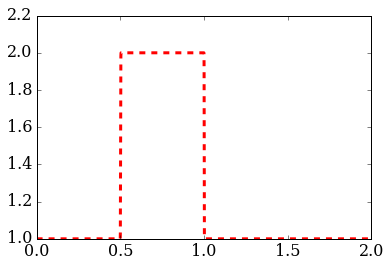

In [54]:
nonlinear(4366,.5)